# Topic: Saudi Arabia's oil production and consumption in 1965-2022 years period  statistical analysis and forecasting of  oil production

Goal: to analyse Saudi Arabia oil consumption and production and prepare oil production forecast

Tasks:

1. Collect data and prepare dataset;
2. Prepare dataset overview;
3. Identify the relationship between oil production and consumption as well as the nature of dataset;
4. By applying different methods, prepare a forecast of oil production in the period from 2000 until 2022 including and comparing results with real data;
5. To compare the applied forecasting methods according to the error values (MSE, RMSE) and to determine the best forecasting method.

# 1. Dataset preparation

Creating library for dataset preparation

In [1]:
import os

root_dir = "SaudiOilData"
package_dir = os.path.join(root_dir, "saudi_oil_data")

os.makedirs(package_dir, exist_ok=True)


with open(os.path.join(package_dir, "__init__.py"), 'w') as f:
    f.write("# SaudiOilData package")

In [2]:
data_processing_code = """
\"\"\"SaudiOilData Library: Data Processing

This module provides functions to process and print oil data related to Saudi Arabia.

Functions:
- load_datasets(): Load production and consumption datasets.
- filter_saudi_data(oil_data): Filter out Saudi Arabia's data.
- merge_datasets(production_data, consumption_data): Merge the production and consumption datasets.
- process_and_print_data(): Main function to process and display oil data for Saudi Arabia.
\"\"\"

import pandas as pd
import requests
import io  # For StringIO

def fetch_dataset_from_github(url):
    response = requests.get(url)
    response.raise_for_status()
    return pd.read_csv(io.StringIO(response.text))

def load_datasets():
    oil_production_url = 'https://raw.githubusercontent.com/Rasagri/saudi-oil-datasets/main/Saudi_oil_production.csv'
    oil_consumption_url = 'https://raw.githubusercontent.com/Rasagri/saudi-oil-datasets/main/Saudi_oil_consumption.csv'
    oil_production = fetch_dataset_from_github(oil_production_url)
    oil_consumption = fetch_dataset_from_github(oil_consumption_url)
    return oil_production, oil_consumption

def filter_saudi_data(oil_data):
    saudi_data = oil_data[oil_data['Entity'] == 'Saudi Arabia']
    return saudi_data.drop(columns=['Code'])

def merge_datasets(production_data, consumption_data):
    merged_data = pd.merge(consumption_data, production_data, on=['Entity', 'Year'], how='inner')
    return merged_data.drop(columns=['Entity'])

def process_and_print_data():
    oil_production, oil_consumption = load_datasets()
    saudi_production = filter_saudi_data(oil_production)
    saudi_consumption = filter_saudi_data(oil_consumption)
    saudi_data = merge_datasets(saudi_production, saudi_consumption)
    saudi_data = saudi_data.rename(columns={
        "Oil consumption - TWh": "Oil_consumption",
        "Oil production (TWh)": "Oil_production"
    })
    print(saudi_data)
    return saudi_data
"""

# Writing the code to the file
with open(os.path.join(package_dir, "data_processing.py"), 'w') as f:
    f.write(data_processing_code)

In [3]:
setup_content = """
from setuptools import setup, find_packages

setup(
    name='SaudiOilData',
    version='0.1',
    packages=find_packages(),
    install_requires=[
        'pandas',
        'requests'
    ]
)
"""

with open(os.path.join(root_dir, "setup.py"), 'w') as f:
    f.write(setup_content)

Installing library

In [4]:
!pip install --user -e ./SaudiOilData

Obtaining file:///C:/Users/rasag/PycharmProjects/PTDM/SaudiOilData
  Found existing installation: SaudiOilData 0.1
    Uninstalling SaudiOilData-0.1:
      Successfully uninstalled SaudiOilData-0.1
  Running setup.py develop for SaudiOilData


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Printing documentation

In [5]:
import SaudiOilData.saudi_oil_data.data_processing as data_processing_module

In [6]:
help(data_processing_module)

Help on module SaudiOilData.saudi_oil_data.data_processing in SaudiOilData.saudi_oil_data:

NAME
    SaudiOilData.saudi_oil_data.data_processing - SaudiOilData Library: Data Processing

DESCRIPTION
    This module provides functions to process and print oil data related to Saudi Arabia.
    
    Functions:
    - load_datasets(): Load production and consumption datasets.
    - filter_saudi_data(oil_data): Filter out Saudi Arabia's data.
    - merge_datasets(production_data, consumption_data): Merge the production and consumption datasets.
    - process_and_print_data(): Main function to process and display oil data for Saudi Arabia.

FUNCTIONS
    fetch_dataset_from_github(url)
    
    filter_saudi_data(oil_data)
    
    load_datasets()
    
    merge_datasets(production_data, consumption_data)
    
    process_and_print_data()

FILE
    c:\users\rasag\pycharmprojects\ptdm\saudioildata\saudi_oil_data\data_processing.py




Dataset preparation

In [1]:
from SaudiOilData.saudi_oil_data.data_processing import *

saudi_data = process_and_print_data()

    Year  Oil_consumption  Oil_production
0   1965        229.13554       1291.2112
1   1966        231.10160       1523.1675
2   1967        233.06763       1643.1690
3   1968        235.05855       1793.6106
4   1969        237.07051       1892.7930
5   1970        247.49394       2234.9546
6   1971        250.45639       2800.4424
7   1972        267.64355       3538.2239
8   1973        283.90036       4466.0900
9   1974        297.71277       4996.7960
10  1975        227.51584       4179.0890
11  1976        265.00204       5085.3410
12  1977        306.65100       5447.4460
13  1978        331.40424       4936.2310
14  1979        400.62827       5675.5664
15  1980        327.53830       5929.0127
16  1981        393.52573       5888.8190
17  1982        437.69144       3956.3428
18  1983        486.50903       2794.4504
19  1984        542.39800       2547.3987
20  1985        551.13380       2001.2020
21  1986        545.25900       2937.7393
22  1987        577.13806       24

# 2. Dataset overview

Creating library for dataset overview

In [8]:
import os

root_dir = "SaudiDataOverview"
package_dir = os.path.join(root_dir, "saudi_data_overview")

os.makedirs(package_dir, exist_ok=True)

open(os.path.join(root_dir, "setup.py"), 'a').close()
open(os.path.join(package_dir, "__init__.py"), 'a').close()
open(os.path.join(package_dir, "visualization.py"), 'a').close()

In [9]:
visualization_code = """
\"\"\"SaudiOilData Library: Data Visualization

This module provides functions to visualize oil data related to Saudi Arabia.

Functions:
- plot_data_overview(saudi_data): Visualize oil consumption and production trends over the years.
- describe_data(saudi_data): Display enhanced descriptive statistics for oil consumption and production.
- calculate_growth_rates(saudi_data): Calculate and display growth rates of oil consumption and production.
- linear_regression(saudi_data): Perform a simple linear regression and display descriptive statistics for consumption and production.
\"\"\"

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

def plot_data_overview(saudi_data):
    \"\"\"Visualize Oil Consumption and Production Trends in Saudi Arabia

    Parameters:
    - saudi_data (pd.DataFrame): Data containing 'Year', 'Oil_consumption', and 'Oil_production' columns.

    Returns:
    - None: Displays a line plot visualizing the consumption and production trends.
    \"\"\"
    plt.figure(figsize=(15, 7))
    plt.plot(saudi_data['Year'], saudi_data['Oil_consumption'], 'k--', label='Oil Consumption')
    plt.plot(saudi_data['Year'], saudi_data['Oil_production'], 'k:', label='Oil Production')
    plt.xlim(saudi_data['Year'].min(), saudi_data['Year'].max())
    plt.title('Oil Consumption and Production in Saudi Arabia (1965-2022), TWh')
    plt.xlabel('Year')
    plt.ylabel('TWh')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def describe_data(saudi_data):
    \"\"\"Display Enhanced Descriptive Statistics for Oil Consumption and Production

    Parameters:
    - saudi_data (pd.DataFrame): Data containing 'Year', 'Oil_consumption', and 'Oil_production' columns.

    Returns:
    - None: Prints an enhanced descriptive statistics table.
    \"\"\"
    desc_stats = saudi_data[['Oil_consumption', 'Oil_production']].describe()
    for stat in desc_stats.index:
        for column in desc_stats.columns:
            value = desc_stats.loc[stat, column]
            if stat == 'count':
                desc_stats.loc[stat, column] = f"{int(value)}"
                continue
            closest_idx = (saudi_data[column] - value).abs().idxmin()
            year = saudi_data.loc[closest_idx, 'Year']
            desc_stats.loc[stat, column] = f"{value:.2f} ({year})"
    print(desc_stats)

def calculate_growth_rates(saudi_data):
    \"\"\"Calculate and Display Growth Rates of Oil Consumption and Production

    Parameters:
    - saudi_data (pd.DataFrame): Data containing 'Year', 'Oil_consumption', and 'Oil_production' columns.

    Returns:
    - None: Prints a table with yearly growth rates and displays a line plot visualizing the growth rates.
    \"\"\"
    saudi_data['Consumption Growth Rate (%)'] = saudi_data['Oil_consumption'].pct_change() * 100
    saudi_data['Production Growth Rate (%)'] = saudi_data['Oil_production'].pct_change() * 100
    print(saudi_data[['Year', 'Consumption Growth Rate (%)', 'Production Growth Rate (%)']])
    plt.figure(figsize=(15, 7))
    plt.plot(saudi_data['Year'], saudi_data['Consumption Growth Rate (%)'], 'k--', label='Consumption Growth Rate (%)', marker='o')
    plt.plot(saudi_data['Year'], saudi_data['Production Growth Rate (%)'], 'k:', label='Production Growth Rate (%)', marker='x')
    plt.xlim(saudi_data['Year'].min(), saudi_data['Year'].max())
    plt.title('Growth Rates of Oil Consumption and Production in Saudi Arabia (1965-2022), %')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def linear_regression(saudi_data):
    \"\"\"Perform Simple Linear Regression and Display Descriptive Statistics

    Parameters:
    - saudi_data (pd.DataFrame): Data containing 'Year', 'Oil_consumption', and 'Oil_production' columns.

    Returns:
    - None: Prints the OLS regression summary for both oil consumption and production.
    \"\"\"
    desc_stats_consumption = sm.OLS(saudi_data['Oil_consumption'], [1] * len(saudi_data)).fit()
    desc_stats_production = sm.OLS(saudi_data['Oil_production'], [1] * len(saudi_data)).fit()
    print("Descriptive statistics for Oil Consumption:")
    print(desc_stats_consumption.summary())
    print("\\nDescriptive statistics for Oil Production:\\n")
    print(desc_stats_production.summary())
"""

with open(os.path.join(package_dir, "visualization.py"), 'w') as f:
    f.write(visualization_code)

In [10]:
setup_content = """
from setuptools import setup, find_packages

setup(
    name='SaudiDataOverview',
    version='0.1',
    packages=find_packages(),
    install_requires=[
        "matplotlib",
        "pandas",
        "statsmodels"
    ]
)
"""

with open(os.path.join(root_dir, "setup.py"), 'w') as f:
    f.write(setup_content)

Installing library

In [11]:
!pip install --user -e ./SaudiDataOverview

Obtaining file:///C:/Users/rasag/PycharmProjects/PTDM/SaudiDataOverview
  Found existing installation: SaudiDataOverview 0.1
    Uninstalling SaudiDataOverview-0.1:
      Successfully uninstalled SaudiDataOverview-0.1
  Running setup.py develop for SaudiDataOverview


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Printing documentation

In [13]:
import SaudiDataOverview.saudi_data_overview.visualization as visualization_module

In [14]:
help(visualization_module)

Help on module SaudiDataOverview.saudi_data_overview.visualization in SaudiDataOverview.saudi_data_overview:

NAME
    SaudiDataOverview.saudi_data_overview.visualization - SaudiOilData Library: Data Visualization

DESCRIPTION
    This module provides functions to visualize oil data related to Saudi Arabia.
    
    Functions:
    - plot_data_overview(saudi_data): Visualize oil consumption and production trends over the years.
    - describe_data(saudi_data): Display enhanced descriptive statistics for oil consumption and production.
    - calculate_growth_rates(saudi_data): Calculate and display growth rates of oil consumption and production.
    - linear_regression(saudi_data): Perform a simple linear regression and display descriptive statistics for consumption and production.

FUNCTIONS
    calculate_growth_rates(saudi_data)
        Calculate and Display Growth Rates of Oil Consumption and Production
        
        Parameters:
        - saudi_data (pd.DataFrame): Data containing 

Dataset overview

In [15]:
from SaudiDataOverview.saudi_data_overview.visualization import *

Line chart

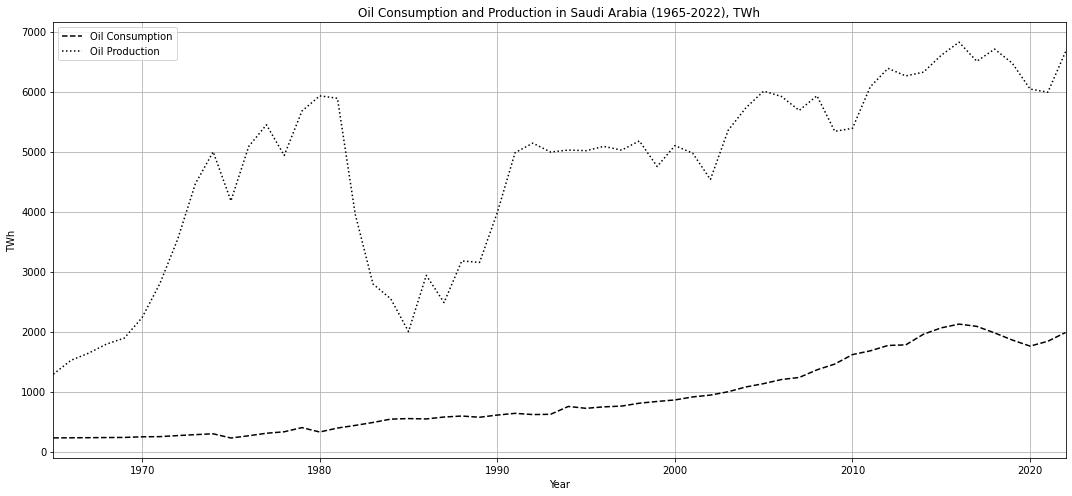

In [16]:
plot_data_overview(saudi_data)

Descriptive statistics

In [17]:
describe_data(saudi_data)

      Oil_consumption  Oil_production
count              58              58
mean    894.50 (2001)  4696.46 (1999)
std     618.65 (1992)  1555.47 (1966)
min     227.52 (1975)  1291.21 (1965)
25%     346.93 (1978)  3642.75 (1972)
50%     680.25 (1991)  5055.83 (1976)
75%    1331.76 (2008)  5926.50 (1980)
max    2125.70 (2016)  6823.46 (2016)


Growth rates

    Year  Consumption Growth Rate (%)  Production Growth Rate (%)
0   1965                          NaN                         NaN
1   1966                     0.858034                   17.964242
2   1967                     0.850721                    7.878418
3   1968                     0.854224                    9.155577
4   1969                     0.855940                    5.529762
5   1970                     4.396764                   18.077074
6   1971                     1.196979                   25.301982
7   1972                     6.862336                   26.345177
8   1973                     6.074053                   26.224064
9   1974                     4.865232                   11.883012
10  1975                   -23.578743                  -16.364626
11  1976                    16.476303                   21.685396
12  1977                    15.716468                    7.120565
13  1978                     8.072121                   -9.384490
14  1979  

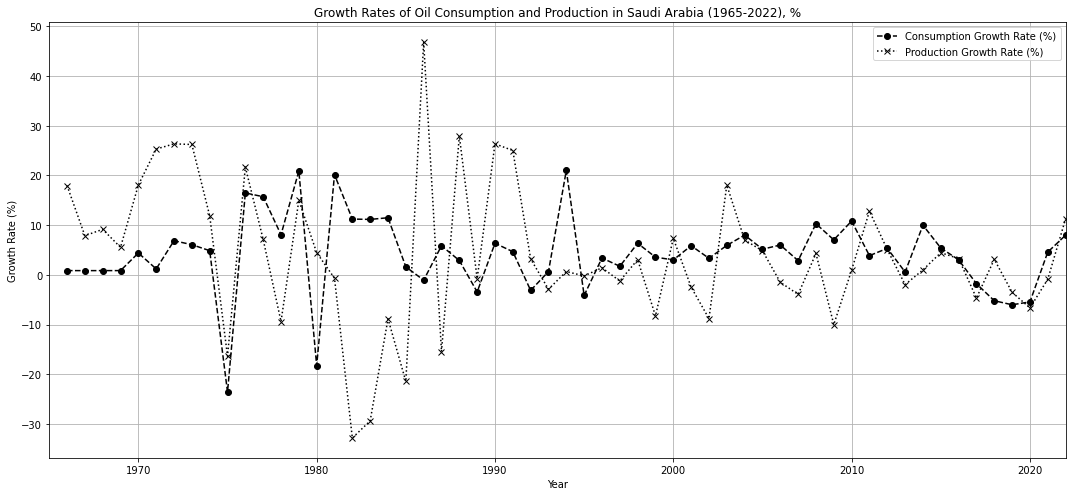

In [18]:
calculate_growth_rates(saudi_data)

Linear regression

In [19]:
linear_regression(saudi_data)

Descriptive statistics for Oil Consumption:
                            OLS Regression Results                            
Dep. Variable:        Oil_consumption   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                nan
Time:                        12:24:28   Log-Likelihood:                -454.59
No. Observations:                  58   AIC:                             911.2
Df Residuals:                      57   BIC:                             913.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

# 3. Hypothesis testing

Creating library for hypothesis testing

In [20]:
import os

lib_root_dir = "SaudiHypothesis"
lib_package_dir = os.path.join(lib_root_dir, "saudi_hypothesis")

os.makedirs(lib_package_dir, exist_ok=True)

open(os.path.join(lib_root_dir, "setup.py"), 'a').close()
open(os.path.join(lib_package_dir, "__init__.py"), 'a').close()
open(os.path.join(lib_package_dir, "tests.py"), 'a').close()

In [21]:
tests_code = """
\"\"\"
SaudiOilData Library: Data Testing Module

This module provides a collection of testing functions specifically tailored for the Saudi oil dataset.
Each function tests a particular property or aspect of the data.

Functions:
- test_stationarity: Checks if the oil consumption and production data are stationary using the Augmented Dickey-Fuller test.
- test_volatility_clustering: Visualizes volatility clustering in the data.
- test_normality: Tests and visualizes if the data follows a normal distribution.
- test_decade_distribution: Provides box plots for data distribution by decade.
- test_correlation: Computes and prints the Spearman rank correlation and Kendall's tau.
\"\"\"

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro, kstest, spearmanr, kendalltau

def test_stationarity(saudi_data):
    \"\"\"Test the stationarity of the oil consumption and production data.\"\"\"
    def _perform_adfuller(series, name):
        result = adfuller(series)
        print('ADF Statistic for', name + ':', result[0])
        print('p-value for', name + ':', result[1])
        print('Critical Values for', name + ':', result[4])
        if result[1] > 0.05:
            print("The series for", name, "is not stationary")
        else:
            print("The series for", name, "is stationary")
        print('----------------------------')
        
    _perform_adfuller(saudi_data['Oil_consumption'], 'Oil_consumption')
    _perform_adfuller(saudi_data['Oil_production'], 'Oil_production')

def test_volatility_clustering(saudi_data):
    \"\"\"Visualizes volatility clustering in the oil consumption and production data.\"\"\"
    for column in ['Oil_consumption', 'Oil_production']:
        saudi_data['Returns'] = saudi_data[column].pct_change().dropna()
        saudi_data['Squared Returns'] = saudi_data['Returns'] ** 2

        plt.figure(figsize=(15, 6))
        plt.plot(saudi_data['Year'], saudi_data['Squared Returns'])
        plt.title(f'Squared Returns Over Time for {column} (to inspect volatility clustering)')
        plt.xlabel('Year')
        plt.ylabel('Squared Returns')
        plt.grid(True)
        plt.show()

def test_normality(saudi_data):
    \"\"\"Tests and visualizes if the oil consumption and production data follows a normal distribution.\"\"\"
    plt.figure(figsize=(15,7))

    for idx, column in enumerate(['Oil_consumption', 'Oil_production'], 1):
        plt.subplot(1, 2, idx)
        saudi_data[column].hist(bins=15, edgecolor='black')
        plt.title(column + ' Distribution')
        plt.xlabel(column + ' (TWh)')
        plt.ylabel('Number of Years')
        
    plt.tight_layout()
    plt.show()
    
    for column in ['Oil_consumption', 'Oil_production']:
        shap_stat, shap_p = shapiro(saudi_data[column])
        ks_stat, ks_p = kstest(saudi_data[column], 'norm')
        
        print(f"Shapiro-Wilk Test for {column}: Statistic = {shap_stat}, p-value = {shap_p}")
        print(f"Kolmogorov-Smirnov Test for {column}: Statistic = {ks_stat}, p-value = {ks_p}")
        print('----------------------------')

def test_decade_distribution(saudi_data):
    \"\"\"Provides box plots for oil consumption and production data distribution by decade.\"\"\"
    saudi_data['Decade'] = (saudi_data['Year'] // 10) * 10

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

    for idx, column in enumerate(['Oil_consumption', 'Oil_production']):
        saudi_data.boxplot(column=column, by='Decade', ax=axes[idx])
        axes[idx].set_title(column + ' by Decade')
        axes[idx].set_xlabel('Decade')
        axes[idx].set_ylabel(column + ' (TWh)')

    fig.suptitle('')  # Remove default title
    plt.tight_layout()
    plt.show()

def test_correlation(saudi_data):
    \"\"\"Computes and prints the Spearman rank correlation and Kendall's tau.\"\"\"
    
    # Spearman Rank Correlation
    rho, p_val_rho = spearmanr(saudi_data['Oil_consumption'], saudi_data['Oil_production'])
    print(f"Spearman rank correlation (rho): {rho}, p-value: {p_val_rho}")
    
    # Kendall's Tau
    tau, p_val_tau = kendalltau(saudi_data['Oil_consumption'], saudi_data['Oil_production'])
    print(f"Kendall's tau: {tau}, p-value: {p_val_tau}")
    print('----------------------------')
"""

with open(os.path.join(lib_package_dir, "tests.py"), 'w') as f:
    f.write(tests_code)

In [22]:
setup_content = """
from setuptools import setup, find_packages

setup(
    name='SaudiHypothesis',
    version='0.1',
    packages=find_packages(),
    install_requires=[
        "pandas",
        "matplotlib",
        "statsmodels",
        "scipy"
    ]
)
"""

with open(os.path.join(lib_root_dir, "setup.py"), 'w') as f:
    f.write(setup_content)

Installing library

In [23]:
!pip install --user -e ./SaudiHypothesis

Obtaining file:///C:/Users/rasag/PycharmProjects/PTDM/SaudiHypothesis
  Found existing installation: SaudiHypothesis 0.1
    Uninstalling SaudiHypothesis-0.1:
      Successfully uninstalled SaudiHypothesis-0.1
  Running setup.py develop for SaudiHypothesis


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Printing documentation

In [24]:
import SaudiHypothesis.saudi_hypothesis.tests as tests_module

In [25]:
help(tests_module)

Help on module SaudiHypothesis.saudi_hypothesis.tests in SaudiHypothesis.saudi_hypothesis:

NAME
    SaudiHypothesis.saudi_hypothesis.tests - SaudiOilData Library: Data Testing Module

DESCRIPTION
    This module provides a collection of testing functions specifically tailored for the Saudi oil dataset.
    Each function tests a particular property or aspect of the data.
    
    Functions:
    - test_stationarity: Checks if the oil consumption and production data are stationary using the Augmented Dickey-Fuller test.
    - test_volatility_clustering: Visualizes volatility clustering in the data.
    - test_normality: Tests and visualizes if the data follows a normal distribution.
    - test_decade_distribution: Provides box plots for data distribution by decade.
    - test_correlation: Computes and prints the Spearman rank correlation and Kendall's tau.

FUNCTIONS
    test_correlation(saudi_data)
        Computes and prints the Spearman rank correlation and Kendall's tau.
    
    tes

Hypothesis testing

In [26]:
from SaudiHypothesis.saudi_hypothesis.tests import *

In [27]:
test_stationarity(saudi_data)

ADF Statistic for Oil_consumption: 0.4938495604283982
p-value for Oil_consumption: 0.9846849549330746
Critical Values for Oil_consumption: {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}
The series for Oil_consumption is not stationary
----------------------------
ADF Statistic for Oil_production: -1.9871020997783626
p-value for Oil_production: 0.29225685576996097
Critical Values for Oil_production: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
The series for Oil_production is not stationary
----------------------------


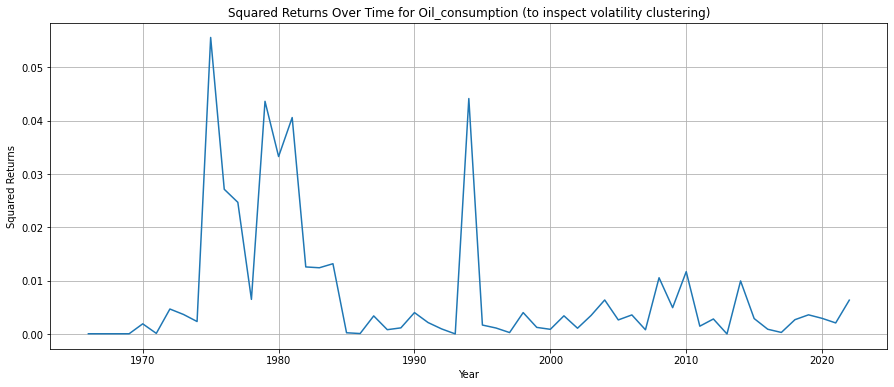

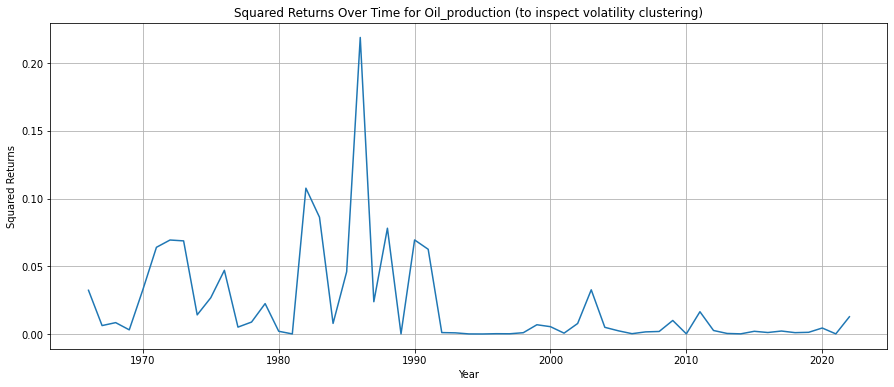

In [28]:
test_volatility_clustering(saudi_data)

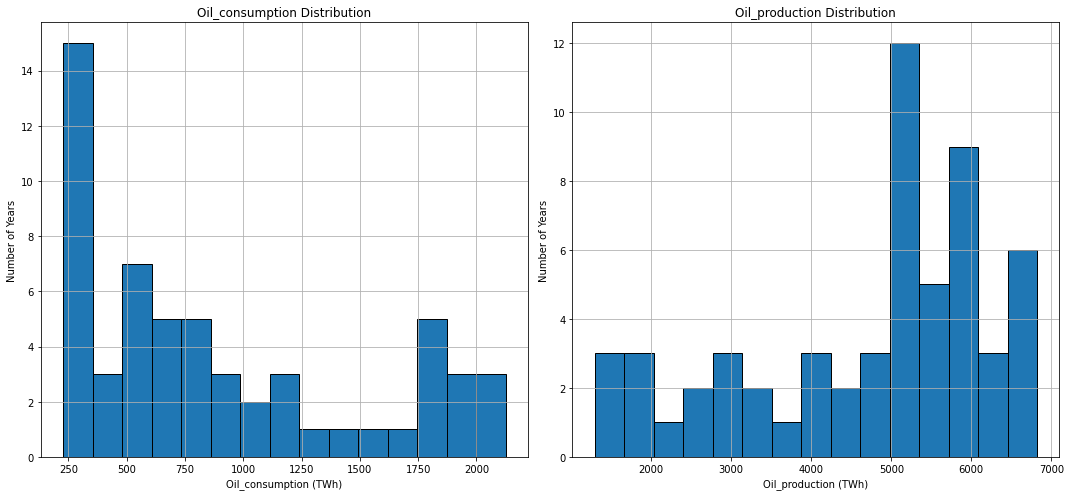

Shapiro-Wilk Test for Oil_consumption: Statistic = 0.8688055872917175, p-value = 1.5378584066638723e-05
Kolmogorov-Smirnov Test for Oil_consumption: Statistic = 1.0, p-value = 0.0
----------------------------
Shapiro-Wilk Test for Oil_production: Statistic = 0.907122015953064, p-value = 0.0003076672146562487
Kolmogorov-Smirnov Test for Oil_production: Statistic = 1.0, p-value = 0.0
----------------------------


In [29]:
test_normality(saudi_data)

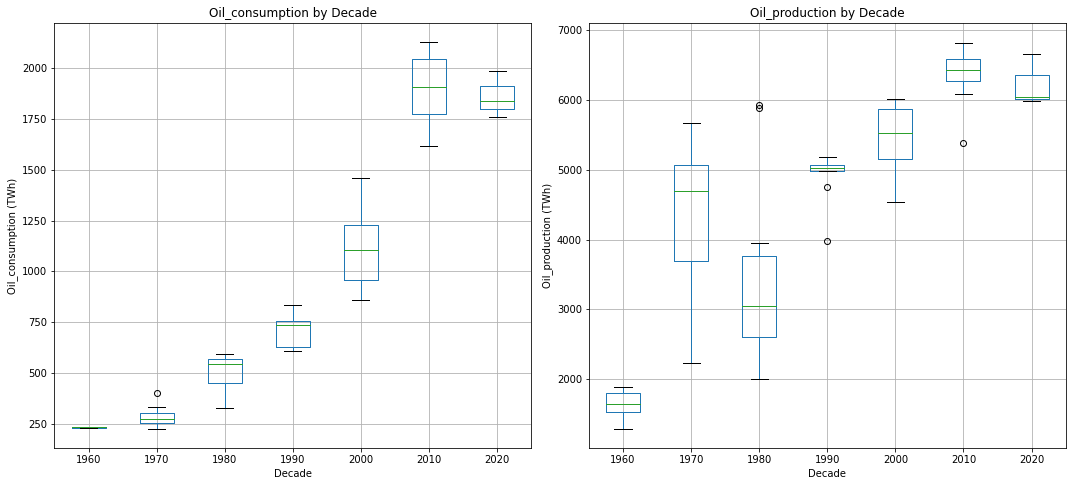

In [30]:
test_decade_distribution(saudi_data)

In [31]:
test_correlation(saudi_data)

Spearman rank correlation (rho): 0.8151281183672215, p-value: 6.8039941456798936e-15
Kendall's tau: 0.6648517846339987, p-value: 1.6799052341866147e-13
----------------------------


# 4. Forecasting

Creating library for Simple exponential smoothing, Holts linear trend, Holt-Winters seasonal method, and LSTM (LONG-SHORT-TERM-MEMORY)

In [32]:
import os

# Directories
root_dir_forecast = "SaudiForecast1"
package_dir_forecast = os.path.join(root_dir_forecast, "saudi_forecast1")

# Create directories
os.makedirs(package_dir_forecast, exist_ok=True)

# Create __init__.py inside the package directory
with open(os.path.join(package_dir_forecast, "__init__.py"), 'w') as f:
    f.write("# SaudiForecast1 package")

In [33]:
forecasting_code = """
\"\"\"SaudiForecast1 Library: Forecasting Oil Production

This module provides functions to forecast oil production for Saudi Arabia using Simple exponential smoothing, Holts linear trend, Holt-Winters seasonal method, and LSTM (LONG-SHORT-TERM-MEMORY).

Available Functions:
- forecast_oil_production(saudi_data): Forecasts oil production and displays the results.
\"\"\"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

def forecast_oil_production(saudi_data):
    \"\"\"Forecast oil production and displays the results.
    
    Args:
    - saudi_data (DataFrame): Data containing Saudi Arabia's oil production details.
    
    Returns:
    - None: Displays a plot of actual vs forecasted oil production and prints the MSE and RMSE.
    \"\"\"
    
    train = saudi_data[saudi_data['Year'] <= 1999].copy()
    test = saudi_data[saudi_data['Year'] > 1999].copy()

    # Simple exponential smoothing
    model_ses = SimpleExpSmoothing(train['Oil_production']).fit(smoothing_level=0.2)
    test['SES'] = model_ses.forecast(len(test))

    # Holts linear trend
    model_holt = Holt(train['Oil_production']).fit(smoothing_level=0.8, smoothing_trend=0.2)
    test['HOLT'] = model_holt.forecast(len(test))

    # Holt-Winters seasonal method
    model_hw = ExponentialSmoothing(train['Oil_production'], seasonal='add', seasonal_periods=12).fit()
    test['HOLT_WINTERS'] = model_hw.forecast(len(test))

    # LSTM
    scaler = MinMaxScaler()
    all_data_scaled = scaler.fit_transform(saudi_data[['Oil_production']])
    train_scaled = all_data_scaled[:len(train)]
    
    time_step = 4
    test_scaled = all_data_scaled[len(train)-time_step:]

    # Function to create dataset for LSTM
    def create_dataset(data, time_step=1):
        dataX, dataY = [], []
        for i in range(len(data) - time_step):
            dataX.append(data[i:(i + time_step), 0])
            dataY.append(data[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test = create_dataset(test_scaled, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

    # Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Transforming predictions to original scale
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    # Insert the LSTM predictions into the test dataset
    test['LSTM'] = np.concatenate([train_predict[-time_step:], test_predict[:-time_step]])

    # Plotting
    plt.figure(figsize=(14,7))
    plt.plot(test['Year'], test['Oil_production'], label='Real data', linestyle='-', color='blue')     
    plt.plot(test['Year'], test['SES'], label='SES Forecast', linestyle='--', color='black')           
    plt.plot(test['Year'], test['HOLT'], label='HOLT Forecast', linestyle='-.', color='black')         
    plt.plot(test['Year'], test['HOLT_WINTERS'], label='Holt-Winters Forecast', linestyle=':', color='black') 
    plt.plot(test['Year'], test['LSTM'], label='LSTM Forecast', linestyle='-', color='black')     
    plt.title('Oil Production real vs. forecast during 2000-2022 years period')
    plt.xlabel('Year')
    plt.ylabel('Oil Production')
    plt.legend()
    plt.grid(True)
    plt.show()

    for method in ['SES', 'HOLT', 'HOLT_WINTERS', 'LSTM']:
        if method == 'LSTM':
            mse = mean_squared_error(test['Oil_production'].iloc[time_step:], test[method].iloc[time_step:])
        else:
            mse = mean_squared_error(test['Oil_production'], test[method])

        rmse = np.sqrt(mse)
        print(f"{method} - MSE: {mse}, RMSE: {rmse}")
"""

# Write the code to the forecasting module
with open(os.path.join(package_dir_forecast, "forecasting.py"), 'w') as f:
    f.write(forecasting_code)

In [34]:
setup_content_forecast = """
from setuptools import setup, find_packages

setup(
    name='SaudiForecast1',
    version='0.1',
    packages=find_packages(),
    install_requires=[
        'numpy',
        'pandas',
        'matplotlib',
        'statsmodels',
        'scikit-learn',
        'keras',
    ]
)

"""

with open(os.path.join(root_dir_forecast, "setup.py"), 'w') as f:
    f.write(setup_content_forecast)

Installing library

In [35]:
!pip install --user -e ./SaudiForecast1

Obtaining file:///C:/Users/rasag/PycharmProjects/PTDM/SaudiForecast1

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Found existing installation: SaudiForecast1 0.1
    Uninstalling SaudiForecast1-0.1:
      Successfully uninstalled SaudiForecast1-0.1
  Running setup.py develop for SaudiForecast1


Printing documentation

In [36]:
import SaudiForecast1.saudi_forecast1.forecasting as forecasting

In [37]:
help(forecasting)

Help on module SaudiForecast1.saudi_forecast1.forecasting in SaudiForecast1.saudi_forecast1:

NAME
    SaudiForecast1.saudi_forecast1.forecasting - SaudiForecast1 Library: Forecasting Oil Production

DESCRIPTION
    This module provides functions to forecast oil production for Saudi Arabia using Simple exponential smoothing, Holts linear trend, Holt-Winters seasonal method, and LSTM (LONG-SHORT-TERM-MEMORY).
    
    Available Functions:
    - forecast_oil_production(saudi_data): Forecasts oil production and displays the results.

FUNCTIONS
    forecast_oil_production(saudi_data)
        Forecast oil production and displays the results.
        
        Args:
        - saudi_data (DataFrame): Data containing Saudi Arabia's oil production details.
        
        Returns:
        - None: Displays a plot of actual vs forecasted oil production and prints the MSE and RMSE.

FILE
    c:\users\rasag\pycharmprojects\ptdm\saudiforecast1\saudi_forecast1\forecasting.py




Forecasting

In [38]:
from SaudiForecast1.saudi_forecast1.forecasting import *

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3183
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3058
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2933
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2806
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2674
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2535
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2389
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2235
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2072
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1901
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1720
Epoch 12/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1531
Epoch 13/100
1/1 [==============================] - 0

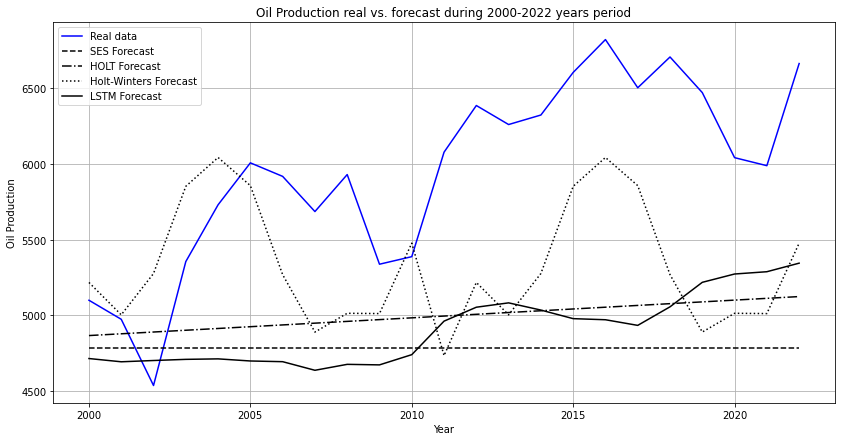

SES - MSE: 1714054.6866756661, RMSE: 1309.2191133174256
HOLT - MSE: 1197307.131874559, RMSE: 1094.2153041675842
HOLT_WINTERS - MSE: 799940.9551818467, RMSE: 894.394183334086
LSTM - MSE: 1555245.4008025625, RMSE: 1247.0947842095093


In [39]:
forecast_oil_production(saudi_data)

Creating library for Random forest regression and Linear regression

In [40]:
import os

root_dir_forecast2 = "SaudiForecast2"
package_dir_forecast2 = os.path.join(root_dir_forecast2, "saudi_forecast2")

os.makedirs(package_dir_forecast2, exist_ok=True)

with open(os.path.join(package_dir_forecast2, "__init__.py"), 'w') as f:
    f.write("# SaudiForecast2 package")

In [41]:
forecasting_rf_lr_code = """
\"\"\"SaudiForecast2 Library: Forecasting Oil Production using Random Forest and Linear Regression.

This module provides functions to forecast oil production for Saudi Arabia using Random Forest and Linear Regression.

Available Functions:
- forecast_oil_rf_lr(saudi_data): Forecasts oil production using Random Forest and Linear Regression and displays the results.
\"\"\"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def forecast_oil_rf_lr(saudi_data):
    train = saudi_data[saudi_data['Year'] <= 1999].copy()
    test = saudi_data[saudi_data['Year'] > 1999].copy()

    X_train = train[['Oil_production']]
    y_train = train['Oil_production']
    X_test = test[['Oil_production']]

    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_test)

    # Plot the forecasts
    plt.figure(figsize=(14,7))
    plt.plot(test['Year'], test['Oil_production'], label='Actual Values', color='black', linewidth=2)
    plt.plot(test['Year'], rf_preds, label='Random Forest Predictions', linestyle='--', color='blue')
    plt.plot(test['Year'], lr_preds, label='Linear Regression Predictions', linestyle='--', color='red')
    plt.xlabel('Year')
    plt.ylabel('Oil Production')
    plt.legend()
    plt.title('Oil Production real vs. forecast during 2000-2022 years period')
    plt.grid(True)
    plt.show()

    test['RF_Predictions'] = rf_preds
    test['LR_Predictions'] = lr_preds

    methods = ['RF_Predictions', 'LR_Predictions']

    for method in methods:
        mse = mean_squared_error(test['Oil_production'], test[method])
        rmse = np.sqrt(mse)
        print(f"{method} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")
"""

# Write the code to the forecasting_rf_lr module
with open(os.path.join(package_dir_forecast2, "forecasting_rf_lr.py"), 'w') as f:
    f.write(forecasting_rf_lr_code)

In [42]:
setup_content_forecast2 = """
from setuptools import setup, find_packages

setup(
    name='SaudiForecast2',
    version='0.1',
    packages=find_packages(),
    install_requires=[
        'numpy',
        'pandas',
        'matplotlib',
        'scikit-learn',
    ]
)
"""

with open(os.path.join(root_dir_forecast2, "setup.py"), 'w') as f:
    f.write(setup_content_forecast2)

Installing library

In [43]:
!pip install --user -e ./SaudiForecast2

Obtaining file:///C:/Users/rasag/PycharmProjects/PTDM/SaudiForecast2
  Found existing installation: SaudiForecast2 0.1
    Uninstalling SaudiForecast2-0.1:
      Successfully uninstalled SaudiForecast2-0.1
  Running setup.py develop for SaudiForecast2


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Printing documentation

In [44]:
import SaudiForecast2.saudi_forecast2.forecasting_rf_lr as forecasting_rf_lr

In [45]:
help(forecasting_rf_lr)

Help on module SaudiForecast2.saudi_forecast2.forecasting_rf_lr in SaudiForecast2.saudi_forecast2:

NAME
    SaudiForecast2.saudi_forecast2.forecasting_rf_lr - SaudiForecast2 Library: Forecasting Oil Production using Random Forest and Linear Regression.

DESCRIPTION
    This module provides functions to forecast oil production for Saudi Arabia using Random Forest and Linear Regression.
    
    Available Functions:
    - forecast_oil_rf_lr(saudi_data): Forecasts oil production using Random Forest and Linear Regression and displays the results.

FUNCTIONS
    forecast_oil_rf_lr(saudi_data)

FILE
    c:\users\rasag\pycharmprojects\ptdm\saudiforecast2\saudi_forecast2\forecasting_rf_lr.py




Forecasting

In [46]:
from SaudiForecast2.saudi_forecast2.forecasting_rf_lr import *

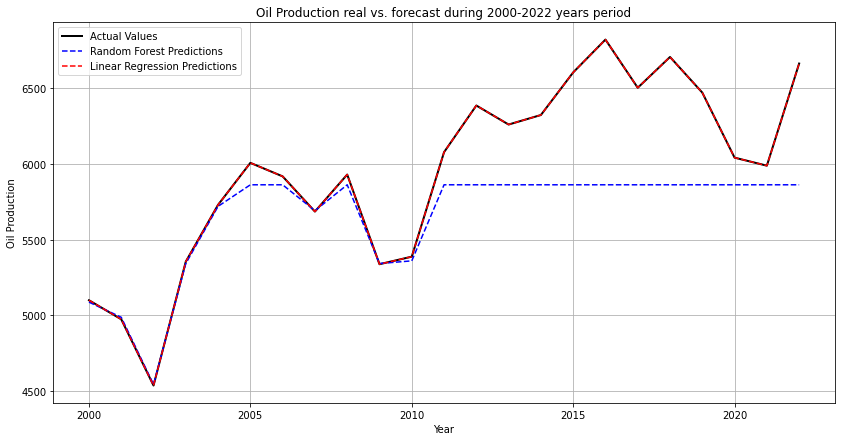

RF_Predictions - MSE: 190632.45, RMSE: 436.61
LR_Predictions - MSE: 0.00, RMSE: 0.00


In [47]:
forecast_oil_rf_lr(saudi_data)

Creating library for Monte Carlo AR(1), AR(2) and AR(3)

In [49]:
import os

root_dir_forecast3 = "SaudiForecast3"
package_dir_forecast3 = os.path.join(root_dir_forecast3, "saudi_forecast3")

os.makedirs(package_dir_forecast3, exist_ok=True)

with open(os.path.join(package_dir_forecast3, "__init__.py"), 'w') as f:
    f.write("# SaudiForecast3 package")

In [50]:
forecasting_code3 = """
\"\"\"SaudiForecast3 Library: Monte Carlo Forecasting using AR models for Oil Production

This module provides functions to forecast oil production for Saudi Arabia using Monte Carlo simulations with AR models.

Available Functions:
- monte_carlo_forecast(saudi_data, lags_order=1): Executes the Monte Carlo forecasting using AR models and plots the results.
\"\"\"

from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def monte_carlo_forecast(saudi_data, lags_order=1):
    \"\"\"Executes the Monte Carlo forecasting using AR models and plots the results.
    
    Args:
    - saudi_data (DataFrame): Data containing Saudi Arabia's oil production details.
    - lags_order (int): Order of the AR model to use (default is 1).
    
    Returns:
    - None: Displays the forecast plot and prints the MSE and RMSE for the closest scenario.
    \"\"\"
    
    train_data = saudi_data[saudi_data['Year'] < 2000]['Oil_production'].values
    test_data = saudi_data[saudi_data['Year'] >= 2000]['Oil_production'].values

    model = AutoReg(train_data, lags=lags_order)
    fit = model.fit()
    
    n_forecast = len(test_data)
    n_scenarios = 100
    scenarios = np.zeros((n_forecast, n_scenarios))

    for i in range(n_scenarios):
        scenario = list(train_data[-lags_order:])
        for t in range(lags_order, lags_order + n_forecast):
            next_val = fit.params[0] 
            for lag in range(1, lags_order + 1):
                next_val += fit.params[lag] * scenario[t-lag]
            next_val += np.random.normal(0, fit.sigma2**0.5)
            scenario.append(next_val)
        scenarios[:, i] = scenario[lags_order:]
    
    errors = np.sum((scenarios - test_data[:, None])**2, axis=0)
    closest_scenario = np.argmin(errors)
    
    plt.figure(figsize=(15, 6))
    for i in range(n_scenarios):
        plt.plot(saudi_data[saudi_data['Year'] >= 2000]['Year'], scenarios[:, i], 'b-', lw=0.5, alpha=0.2)

    legend_lines = [Line2D([0], [0], color='blue', lw=2, alpha=0.1, label='Generated Scenarios'),
                    Line2D([0], [0], color='black', lw=2, label='Actual Oil Production for Test Period'),
                    Line2D([0], [0], color='red', lw=2, label='Closest Scenario')]
    plt.plot(saudi_data[saudi_data['Year'] >= 2000]['Year'], test_data, 'black', linewidth=2)
    plt.plot(saudi_data[saudi_data['Year'] >= 2000]['Year'], scenarios[:, closest_scenario], 'r-', linewidth=2)
    plt.title(f'Monte Carlo Forecasting of Oil Production using AR({lags_order}) Model (2000-2022)')
    plt.xlabel('Year')
    plt.ylabel('Oil Production')
    plt.legend(handles=legend_lines)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    mse = np.mean((test_data - scenarios[:len(test_data), closest_scenario])**2)
    rmse = np.sqrt(mse)

    print(f"MSE for the closest scenario: {mse:.2f}")
    print(f"RMSE for the closest scenario: {rmse:.2f}")

"""

# Write the code to the forecasting module
with open(os.path.join(package_dir_forecast3, "montecarlo_forecasting.py"), 'w') as f:
    f.write(forecasting_code3)

In [51]:
setup_content_forecast3 = """
from setuptools import setup, find_packages

setup(
    name='SaudiForecast3',
    version='0.1',
    packages=find_packages(),
    install_requires=[
        'numpy',
        'pandas',
        'matplotlib',
        'statsmodels'
    ]
)

"""

with open(os.path.join(root_dir_forecast3, "setup.py"), 'w') as f:
    f.write(setup_content_forecast3)

Installing library

In [52]:
!pip install --user -e ./SaudiForecast3

Obtaining file:///C:/Users/rasag/PycharmProjects/PTDM/SaudiForecast3
  Found existing installation: SaudiForecast3 0.1
    Uninstalling SaudiForecast3-0.1:
      Successfully uninstalled SaudiForecast3-0.1
  Running setup.py develop for SaudiForecast3


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Printing documentation

In [53]:
from SaudiForecast3.saudi_forecast3.montecarlo_forecasting import monte_carlo_forecast

In [54]:
help(monte_carlo_forecast)

Help on function monte_carlo_forecast in module SaudiForecast3.saudi_forecast3.montecarlo_forecasting:

monte_carlo_forecast(saudi_data, lags_order=1)
    Executes the Monte Carlo forecasting using AR models and plots the results.
    
    Args:
    - saudi_data (DataFrame): Data containing Saudi Arabia's oil production details.
    - lags_order (int): Order of the AR model to use (default is 1).
    
    Returns:
    - None: Displays the forecast plot and prints the MSE and RMSE for the closest scenario.



Forecasting AR(1)

In [55]:
from SaudiForecast3.saudi_forecast3 import *

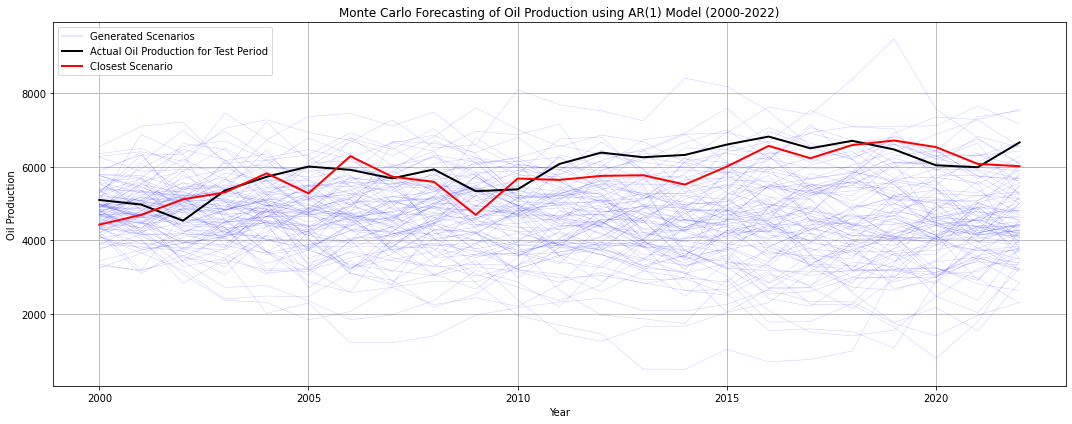

MSE for the closest scenario: 212614.79
RMSE for the closest scenario: 461.10


In [56]:
monte_carlo_forecast(saudi_data, lags_order=1)

Forecasting AR(2)

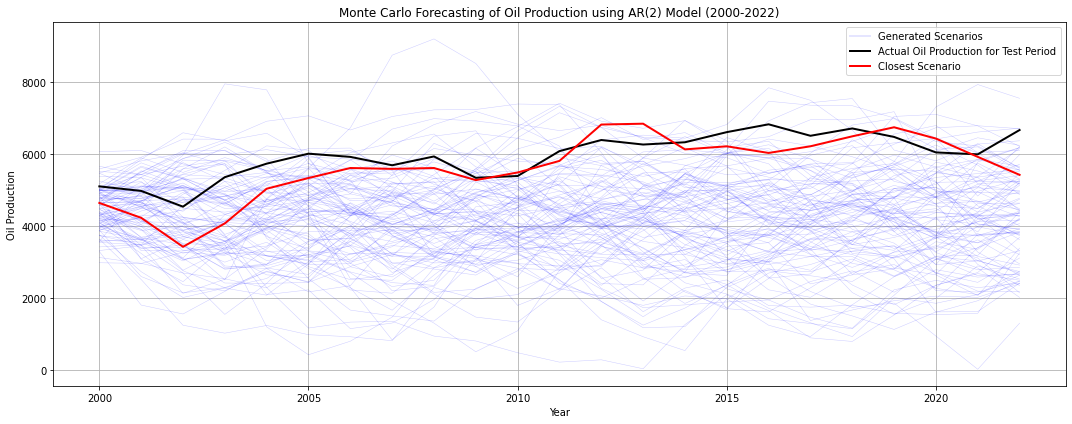

MSE for the closest scenario: 354366.15
RMSE for the closest scenario: 595.29


In [57]:
monte_carlo_forecast(saudi_data, lags_order=2)

Forecasting AR(3)

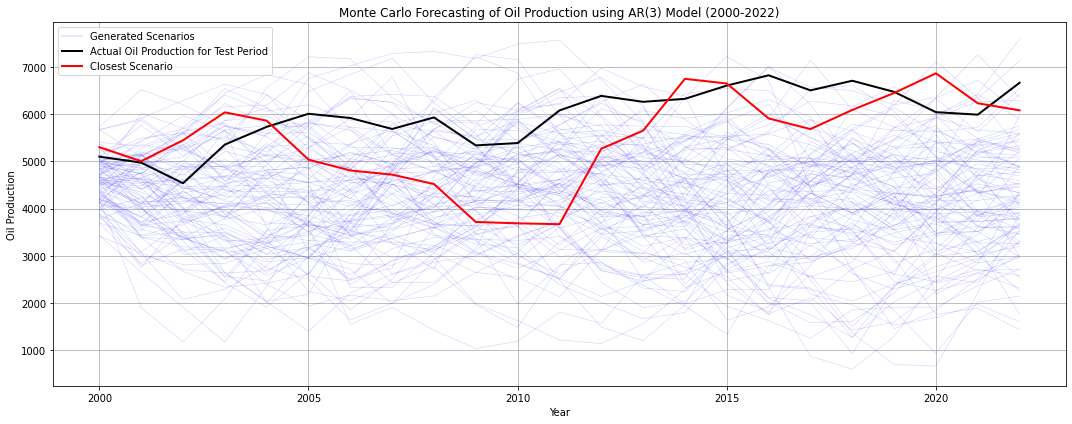

MSE for the closest scenario: 981374.49
RMSE for the closest scenario: 990.64


In [58]:
monte_carlo_forecast(saudi_data, lags_order=3)

# Additionally: forecasting with Monte Carlo bootsrap sampling

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
# Set seed for reproducibility
np.random.seed(42)

In [4]:
train_data = saudi_data[saudi_data['Year'] < 2000]['Oil_production'].values
test_data = saudi_data[saudi_data['Year'] >= 2000]['Oil_production'].values

In [5]:
n_forecast = len(test_data)
n_scenarios = 100
scenarios = np.zeros((n_forecast, n_scenarios))

for i in range(n_scenarios):
    bootstrap_sample = np.random.choice(train_data, size=n_forecast, replace=True)
    scenarios[:, i] = bootstrap_sample

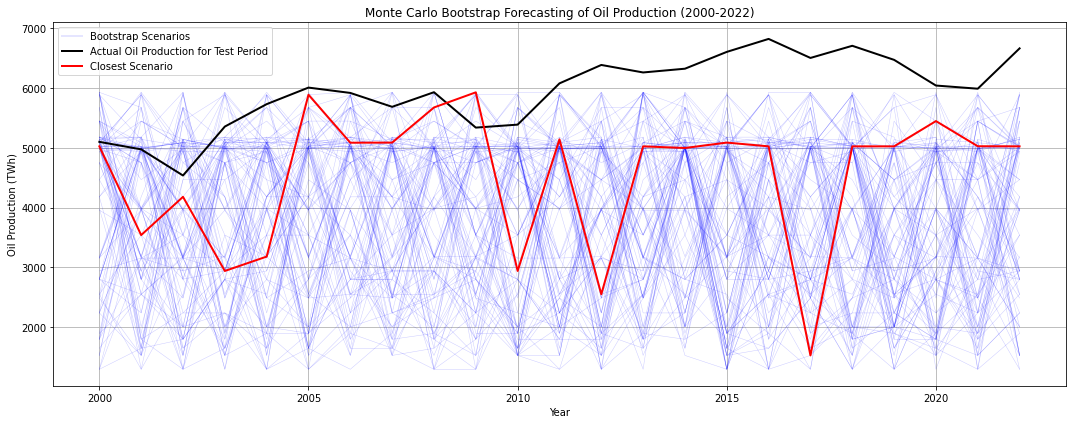

In [6]:
test_years = saudi_data[saudi_data['Year'] >= 2000]['Year'].values

plt.figure(figsize=(15, 6))
for i in range(n_scenarios):
    plt.plot(test_years, scenarios[:, i], 'b-', lw=0.5, alpha=0.2)

errors = np.sum((scenarios - test_data[:, None])**2, axis=0)
closest_scenario = np.argmin(errors)

legend_lines = [Line2D([0], [0], color='blue', lw=2, alpha=0.1, label='Bootstrap Scenarios'),
                Line2D([0], [0], color='black', lw=2, label='Actual Oil Production for Test Period'),
                Line2D([0], [0], color='red', lw=2, label='Closest Scenario')]

plt.plot(test_years, test_data, 'black', linewidth=2)
plt.plot(test_years, scenarios[:, closest_scenario], 'r-', linewidth=2)

plt.title('Monte Carlo Bootstrap Forecasting of Oil Production (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Oil Production (TWh)')
plt.legend(handles=legend_lines)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
mse = np.mean((test_data - scenarios[:, closest_scenario])**2)
rmse = np.sqrt(mse)

print(f"MSE for the closest scenario: {mse:.2f}")
print(f"RMSE for the closest scenario: {rmse:.2f}")

MSE for the closest scenario: 3488360.02
RMSE for the closest scenario: 1867.72
